### –†–µ–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞–∑–≤–µ—Ä—Ç—ã–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ gradio 
### —Å—Å—ã–ª–∫–∞ https://gradio.app/quickstart/

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

from going_modular.going_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves

from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb
%matplotlib inline

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
#Creata seed fucntions
def set_seeds(seed: int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

# –°—Å—ã–ª–∫–∏ –Ω–∞ –¥–∞–Ω–Ω—ã–µ

In [5]:
image_path = "Dataset\pizza_steak_sushi_20"
train_dir = image_path + "/train"
test_dir = image_path + "/test"

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ EffNetB2 

1. –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å
2. –ü–æ–ª—É—á–∞–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö
3. –ó–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤—Å–µ —Å–ª–æ–∏ (–Ω–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Å–Ω–æ–≤–∞ –∏—Ö –æ–±—É—á–∞—Ç—å)
4. –ê–¥–∞–ø—Ç–∏—Ä—É–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ —Å–ª–æ–∏ –ø–æ–¥ –Ω–∞—à –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö (–ø–∏—Ü—Ü–∞, —Å—Ç–µ–π–∫–∏, —Ä–æ–ª–ª—ã)
5. –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ
6. –û–±—É—á–∏–º (–∑–∞–≥—Ä—É–∂–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å) –Ω–∞ –Ω–∞—à–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
7. –û—Ü–µ–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ (–∫—Ä–∏–≤—ã–µ, –º–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫)
8. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∏—Å–∫

In [10]:
# Step 1 - 4
def create_effnetb2_model(num_classes:int=3, 
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return model, transforms

In [11]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

In [12]:
# Step 5
train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)

In [13]:
# Step 6
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Set seeds for reproducibility and train the model
set_seeds()
effnetb2_results = engine.train(model=effnetb2,
                                train_dataloader=train_dataloader_effnetb2,
                                test_dataloader=test_dataloader_effnetb2,
                                epochs=10,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9849 | train_acc: 0.5771 | test_loss: 0.7385 | test_acc: 0.9347
Epoch: 2 | train_loss: 0.7111 | train_acc: 0.8521 | test_loss: 0.5865 | test_acc: 0.9409
Epoch: 3 | train_loss: 0.5859 | train_acc: 0.8979 | test_loss: 0.4891 | test_acc: 0.9500
Epoch: 4 | train_loss: 0.4499 | train_acc: 0.9104 | test_loss: 0.4341 | test_acc: 0.9409
Epoch: 5 | train_loss: 0.4278 | train_acc: 0.9083 | test_loss: 0.3922 | test_acc: 0.9443
Epoch: 6 | train_loss: 0.4405 | train_acc: 0.8833 | test_loss: 0.3524 | test_acc: 0.9597
Epoch: 7 | train_loss: 0.4262 | train_acc: 0.8812 | test_loss: 0.3269 | test_acc: 0.9563
Epoch: 8 | train_loss: 0.3836 | train_acc: 0.9083 | test_loss: 0.3478 | test_acc: 0.9352
Epoch: 9 | train_loss: 0.3739 | train_acc: 0.8833 | test_loss: 0.3146 | test_acc: 0.9193
Epoch: 10 | train_loss: 0.3668 | train_acc: 0.8667 | test_loss: 0.2817 | test_acc: 0.9688


In [18]:
# Step 7
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from tqdm.auto import tqdm
from helper_functions import plot_loss_curves


def get_train_inf(models,
                  result,
                  test_dataloader,
                  normalize = False,
                  classes = ('pizza', 'steak', 'sushi')
                  ):
    #get plot loss and accuracy
    plot_loss_curves(result)
    
    # get Confusion Matrix
    y_preds = []
    models.eval()
    with torch.inference_mode(): # get predict data
      for X, y in tqdm(test_dataloader, desc="Making predictions"):
        X, y = X.to(device), y.to(device)
        x = X.unsqueeze(dim=0)
        y_logit = models(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())
    # Concatenate list of predictions into a tensor
    y_pred_tensor = torch.cat(y_preds)
    
    
    y_pred = []
    y_true = []
    
    # iterate over test data
    for inputs, labels in test_dataloader:
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) 

    # constant for classes
  

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred_tensor)
    if normalize:
        value = cf_matrix/np.sum(cf_matrix)
    else:
        value = cf_matrix

    df_cm = pd.DataFrame(value, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,7))
    plt.title('Confusion Matrix')
    sn.heatmap(df_cm, annot=True)
    
    
    


Making predictions:   0%|          | 0/5 [00:00<?, ?it/s]

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\Users\Tosch\anaconda3\envs\tf\lib\multiprocessing\queues.py", line 239, in _feed
    reader_close()
  File "C:\Users\Tosch\anaconda3\envs\tf\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\Users\Tosch\anaconda3\envs\tf\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] –ù–µ–≤–µ—Ä–Ω—ã–π –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Tosch\anaconda3\envs\tf\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\Tosch\anaconda3\envs\tf\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tosch\anaconda3\envs\tf\lib\multiprocessing\queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times


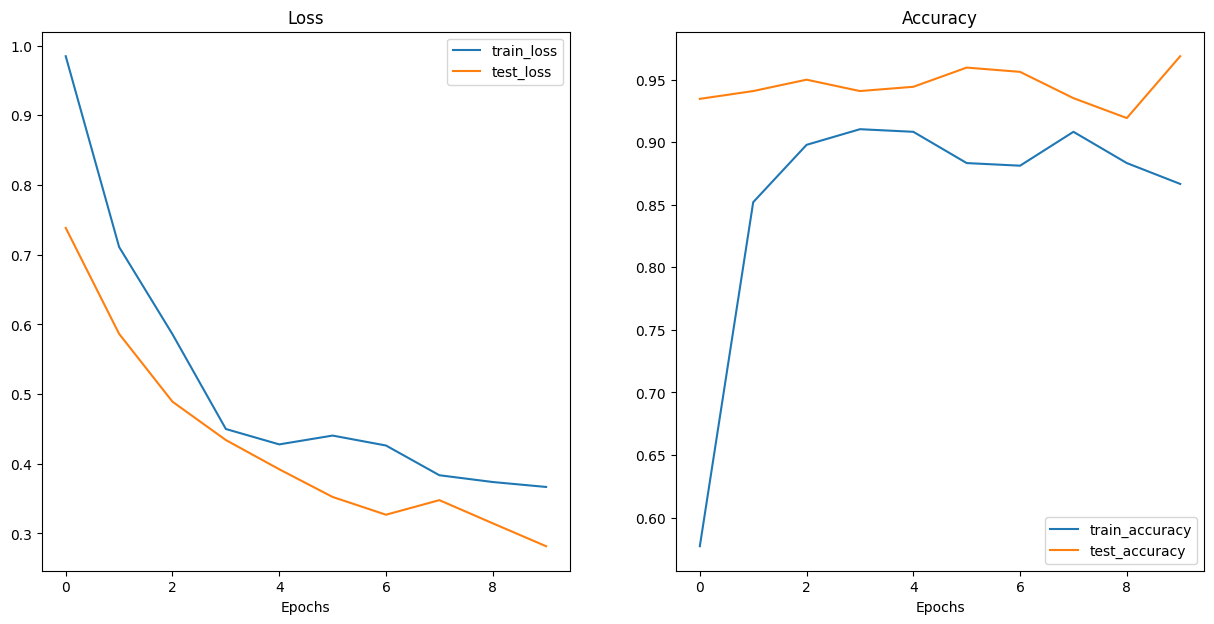

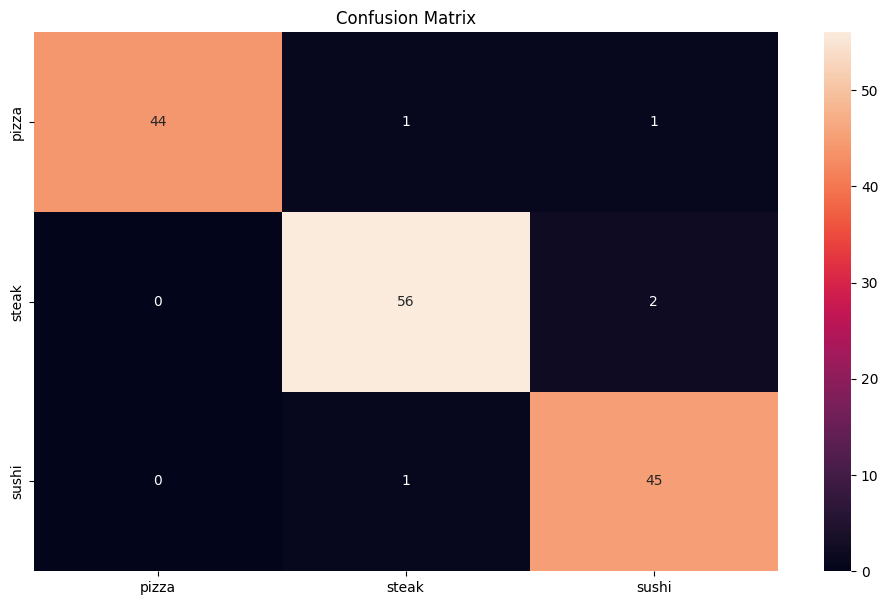

In [21]:
get_train_inf(effnetb2, effnetb2_results, test_dataloader = test_dataloader_effnetb2)

In [24]:
# Step 8
from going_modular.going_modular import utils

# Save the model
utils.save_model(model=effnetb2,
                 target_dir="Models",
                 model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

pretrained_effnetb2_model_size = Path("models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())

[INFO] Saving model to: Models\09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


In [25]:
# –°–æ—Ö—Ä–∞–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ —Å–ª–æ–≤–∞—Ä—å –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
effnetb2_stats = {"test_loss": effnetb2_results["test_loss"][-1],
                  "test_acc": effnetb2_results["test_acc"][-1],
                  "number_of_parameters": effnetb2_total_params,
                  "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

{'test_loss': 0.28171582221984864,
 'test_acc': 0.96875,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29}

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ ViT
1. –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å
2. –ü–æ–ª—É—á–∞–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö
3. –ó–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤—Å–µ —Å–ª–æ–∏ (–Ω–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Å–Ω–æ–≤–∞ –∏—Ö –æ–±—É—á–∞—Ç—å)
4. –ê–¥–∞–ø—Ç–∏—Ä—É–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ —Å–ª–æ–∏ –ø–æ–¥ –Ω–∞—à –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö (–ø–∏—Ü—Ü–∞, —Å—Ç–µ–π–∫–∏, —Ä–æ–ª–ª—ã)
5. –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ
6. –û–±—É—á–∏–º (–∑–∞–≥—Ä—É–∂–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å) –Ω–∞ –Ω–∞—à–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
7. –û—Ü–µ–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ (–∫—Ä–∏–≤—ã–µ, –º–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫)
8. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∏—Å–∫

In [26]:
vit = torchvision.models.vit_b_16()
vit.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [27]:
def create_vit_model(num_classes:int=3, 
                     seed:int=42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model. 
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    # Create ViT_B_16 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights=weights)

    # Freeze all layers in model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head to suit our needs (this will be trainable)
    torch.manual_seed(seed)
    model.heads = nn.Sequential(nn.Linear(in_features=768, # keep this the same as original model
                                          out_features=num_classes)) # update to reflect target number of classes
    
    return model, transforms

In [28]:
vit, vit_transforms = create_vit_model(num_classes=3,
                                       seed=42)

In [29]:
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_transforms,
                                                                                       batch_size=32)

In [30]:
# Setup optimizer
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Train ViT model with seeds set for reproducibility
set_seeds()
vit_results = engine.train(model=vit,
                           train_dataloader=train_dataloader_vit,
                           test_dataloader=test_dataloader_vit,
                           epochs=10,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7020 | train_acc: 0.7521 | test_loss: 0.2714 | test_acc: 0.9381
Epoch: 2 | train_loss: 0.2532 | train_acc: 0.9062 | test_loss: 0.1672 | test_acc: 0.9602
Epoch: 3 | train_loss: 0.1764 | train_acc: 0.9542 | test_loss: 0.1273 | test_acc: 0.9693
Epoch: 4 | train_loss: 0.1276 | train_acc: 0.9625 | test_loss: 0.1074 | test_acc: 0.9722
Epoch: 5 | train_loss: 0.1159 | train_acc: 0.9646 | test_loss: 0.0953 | test_acc: 0.9784
Epoch: 6 | train_loss: 0.1274 | train_acc: 0.9375 | test_loss: 0.0832 | test_acc: 0.9722
Epoch: 7 | train_loss: 0.0897 | train_acc: 0.9771 | test_loss: 0.0845 | test_acc: 0.9784
Epoch: 8 | train_loss: 0.0919 | train_acc: 0.9812 | test_loss: 0.0764 | test_acc: 0.9722
Epoch: 9 | train_loss: 0.0922 | train_acc: 0.9792 | test_loss: 0.0734 | test_acc: 0.9784
Epoch: 10 | train_loss: 0.0658 | train_acc: 0.9833 | test_loss: 0.0644 | test_acc: 0.9847


Making predictions:   0%|          | 0/5 [00:00<?, ?it/s]

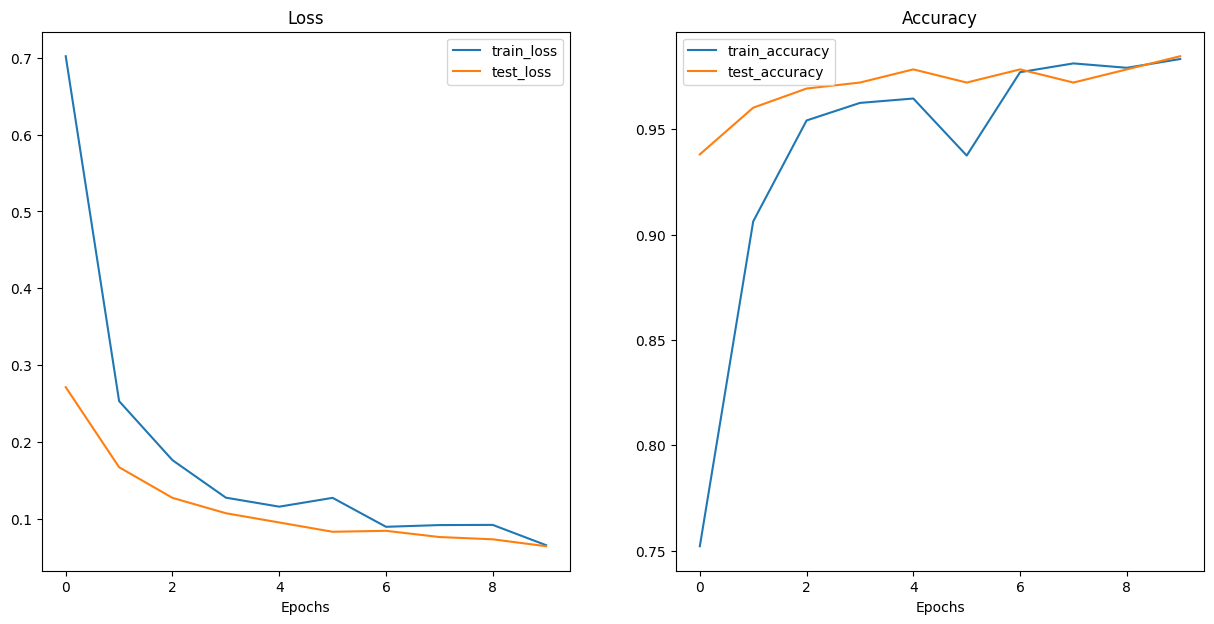

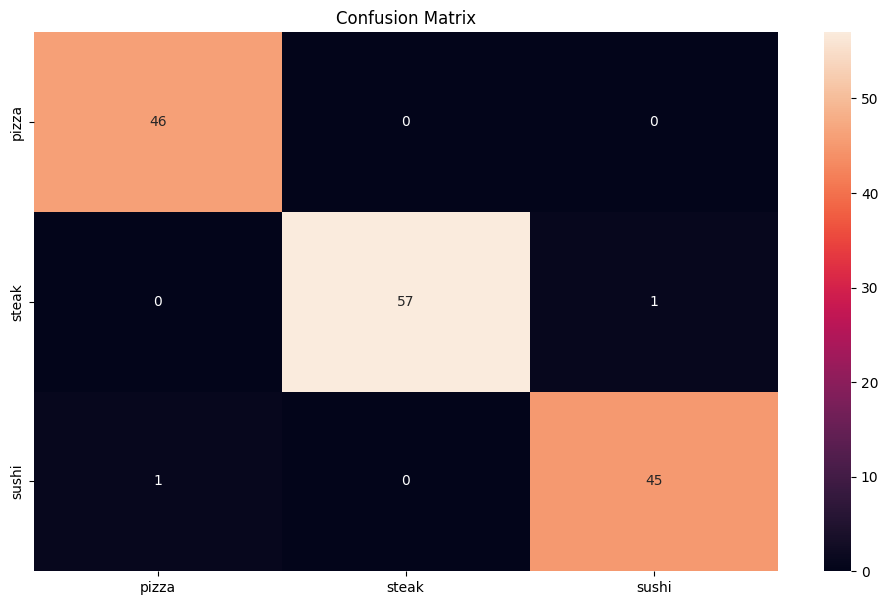

In [31]:
get_train_inf(vit, vit_results, test_dataloader = test_dataloader_vit)

In [32]:
utils.save_model(model=vit,
                 target_dir="models",
                 model_name="09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth")

pretrained_vit_model_size = Path("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
vit_total_params = sum(torch.numel(param) for param in vit.parameters())

vit_stats = {"test_loss": vit_results["test_loss"][-1],
             "test_acc": vit_results["test_acc"][-1],
             "number_of_parameters": vit_total_params,
             "model_size (MB)": pretrained_vit_model_size}

vit_stats

[INFO] Saving model to: models\09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth


{'test_loss': 0.06443452695384622,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327}

# –ü—Ä–æ–≥–Ω–æ–∑—ã –æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –∑–∞–º–µ—Ä –≤—Ä–µ–º–µ–Ω–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è
1. –°–æ–∑–¥–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –∏ —Ä–∞—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑
2. –°—á–∏—Ç–∞–µ–º 
3. –°–æ—Ö—Ä–∞–Ω—è–º –∏ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º

In [34]:
from pathlib import Path
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[:5]

[WindowsPath('Dataset/pizza_steak_sushi_20/test/pizza/1001116.jpg'),
 WindowsPath('Dataset/pizza_steak_sushi_20/test/pizza/1032754.jpg'),
 WindowsPath('Dataset/pizza_steak_sushi_20/test/pizza/1067986.jpg'),
 WindowsPath('Dataset/pizza_steak_sushi_20/test/pizza/129666.jpg'),
 WindowsPath('Dataset/pizza_steak_sushi_20/test/pizza/1315645.jpg')]

In [36]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏ –∏ —Ä–∞—Å—á–µ—Ç–∞ –∑–∞–º–µ—Ä–∞ –≤—Ä–µ–º–µ–Ω–∏ (–Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ) # Todo - save def to engine.py
import pathlib
from PIL import Image
from timeit import default_timer as timer 
from tqdm.auto import tqdm
from typing import List, Dict

def pred_and_store(paths: List[pathlib.Path], 
                   model: torch.nn.Module,
                   transform: torchvision.transforms, 
                   class_names: List[str], 
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:
    
    # 2. Create an empty list to store prediction dictionaires
    pred_list = []
    
    # 3. Loop through target paths
    for path in tqdm(paths):
        
        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name
        
        # 6. Start the prediction timer
        start_time = timer()
        
        # 7. Open image path
        img = Image.open(path)
        
        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device) 
        
        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()
        
        # 10. Get prediction probability, predicition label and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample 
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on) 
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class
            
            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)

        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)
    
    # 15. Return list of prediction dictionaries
    return pred_list


In [48]:
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device="cpu") # make predictions on CPU 

  0%|          | 0/150 [00:00<?, ?it/s]

In [54]:
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
print(effnetb2_test_pred_df.correct.value_counts())

effnetb2_average_time_per_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_per_pred} seconds")

effnetb2_stats["time_per_pred_cpu"] = effnetb2_average_time_per_pred
print(effnetb2_stats)

True     145
False      5
Name: correct, dtype: int64
EffNetB2 average time per prediction: 0.1033 seconds
{'test_loss': 0.28171582221984864, 'test_acc': 0.96875, 'number_of_parameters': 7705221, 'model_size (MB)': 29, 'time_per_pred_cpu': 0.1033}


In [55]:
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                     model=vit,
                                     transform=vit_transforms,
                                     class_names=class_names,
                                     device="cpu")

  0%|          | 0/150 [00:00<?, ?it/s]

In [56]:
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
print(vit_test_pred_df.correct.value_counts())

vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"Vit average time per prediction: {vit_average_time_per_pred} seconds")

vit_stats["time_per_pred_cpu"] = vit_average_time_per_pred
print(vit_stats)

True     148
False      2
Name: correct, dtype: int64
Vit average time per prediction: 0.1761 seconds
{'test_loss': 0.06443452695384622, 'test_acc': 0.984659090909091, 'number_of_parameters': 85800963, 'model_size (MB)': 327, 'time_per_pred_cpu': 0.1761}


# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–±—É—á–µ–Ω–∏–µ –∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ –º–æ–¥–µ–ª–µ–π
1. –°–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –º–æ–¥–µ–ª–µ–π
2. –ü—Ä–æ–≤–µ–¥–µ–º –ø–µ—Ä–µ–∫—Ä–µ—Å—Ç–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –º–æ–¥–µ–ª–µ–π

In [58]:
# Turn stat dictionaries into DataFrame
df = pd.DataFrame([effnetb2_stats, vit_stats])

# Add column for model names
df["model"] = ["EffNetB2", "ViT"]

# Convert accuracy to percentages
df["test_acc"] = round(df["test_acc"] * 100, 2)

df

test_loss  test_acc  number_of_parameters  model_size (MB)  \
0   0.281716     96.88               7705221               29   
1   0.064435     98.47              85800963              327   

   time_per_pred_cpu     model  
0             0.1033  EffNetB2  
1             0.1761       ViT

In [61]:
pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]), # divide ViT statistics by EffNetB2 statistics
             columns=["ViT to EffNetB2 ratios"]).T

test_loss  test_acc  number_of_parameters  \
ViT to EffNetB2 ratios   0.228722  1.016412             11.135432   

                        model_size (MB)  time_per_pred_cpu  
ViT to EffNetB2 ratios        11.275862           1.704743

* 11x+ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
* 11x+ —Ä–∞–∑–º–µ—Ä –º–æ–¥–µ–ª–∏.
* 1.70+ —Ä–∞–∑–∞ –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ.

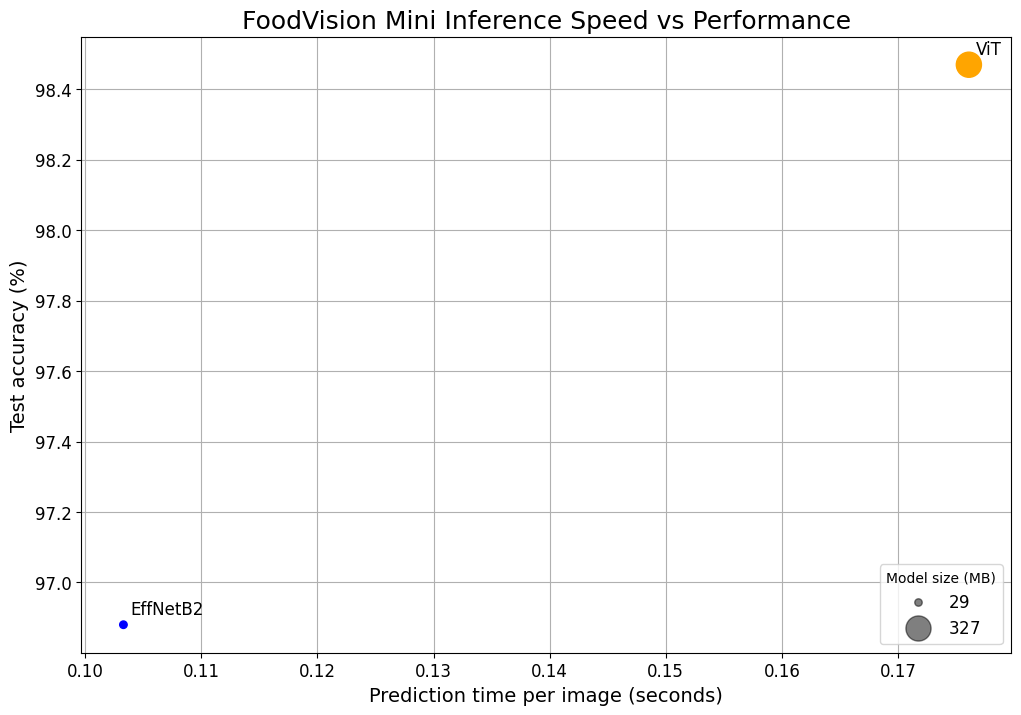

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data=df, 
                     x="time_per_pred_cpu", 
                     y="test_acc", 
                     c=["blue", "orange"], # what colours to use?
                     s="model_size (MB)") # size the dots by the model sizes

# 2. Add titles, labels and customize fontsize for aesthetics
ax.set_title("FoodVision Mini Inference Speed vs Performance", fontsize=18)
ax.set_xlabel("Prediction time per image (seconds)", fontsize=14)
ax.set_ylabel("Test accuracy (%)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)

# 3. Annotate with model names
for index, row in df.iterrows():
    ax.annotate(text=row["model"], # note: depending on your version of Matplotlib, you may need to use "s=..." or "text=...", see: https://github.com/faustomorales/keras-ocr/issues/183#issuecomment-977733270 
                xy=(row["time_per_pred_cpu"]+0.0006, row["test_acc"]+0.03),
                size=12)

# 4. Create a legend based on model sizes
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.5)
model_size_legend = ax.legend(handles, 
                              labels, 
                              loc="lower right", 
                              title="Model size (MB)",
                              fontsize=12)

# Save the figure
#plt.savefig()

# Show the figure
plt.show()

# –†–∞–∑–≤–µ—Ä—Ç—ã–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ 

In [66]:
import gradio as gr

In [68]:
# –§—É–Ω–∫—Ü–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è 
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

In [70]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: Dataset\pizza_steak_sushi_20\test\steak\3173402.jpg

Prediction label and probability dictionary: 
{'pizza': 0.0915144681930542, 'steak': 0.897412121295929, 'sushi': 0.01107352040708065}
Prediction time: 0.08911 seconds


In [71]:
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['Dataset\\pizza_steak_sushi_20\\test\\pizza\\482858.jpg'],
 ['Dataset\\pizza_steak_sushi_20\\test\\sushi\\3365273.jpg'],
 ['Dataset\\pizza_steak_sushi_20\\test\\steak\\108310.jpg']]

# –†–µ–∞–ª–∏–∑–∞—Ü–∏—è 
1. –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
2. –ú–æ–¥–µ–ª—å (–æ–±—Ä–∞–±–æ—Ç–∫–∞)
3. –†–µ–∑—É–ª—å—Ç–∞—Ç

In [73]:
title = "FoodVision üçïü•©üç£"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Bla"

demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type="pil"),
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), 
                             gr.Number(label="Prediction time (s)")],
                    examples=example_list, 
                    title=title,
                    description=description,
                    article=article)

demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://db5813a721d978dcb8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [74]:
demo.close()

Closing server running on port: 7860
